In [69]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

In [38]:
nodes = 100
links = 500

In [10]:
def creating_adjacency_matrix(nodes, links):
    num_link = 0
    L = np.zeros((nodes, nodes))
    while num_link < links:
        i = np.random.randint(nodes)
        j = np.random.randint(nodes)
        if (i != j) and L[i, j] == 0:
            weight = np.random.randint(66)
            L[i, j] = weight
            L[j, i] = weight
            num_link += 1
    return L

In [11]:
L = creating_adjacency_matrix(nodes, links)
L

array([[ 0., 40.,  0., ...,  0.,  0.,  0.],
       [40.,  0.,  0., ..., 57.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0., 57.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
print(L[0,:])

[ 0. 40.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 22.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 38.  0.  0.  0.  0.  0.  0.  0.  0. 56.  0.  0.  0. 63.
  0.  0.  0.  0. 21.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 53.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 62.  0. 50.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [17]:
G = nx.from_numpy_matrix(L)

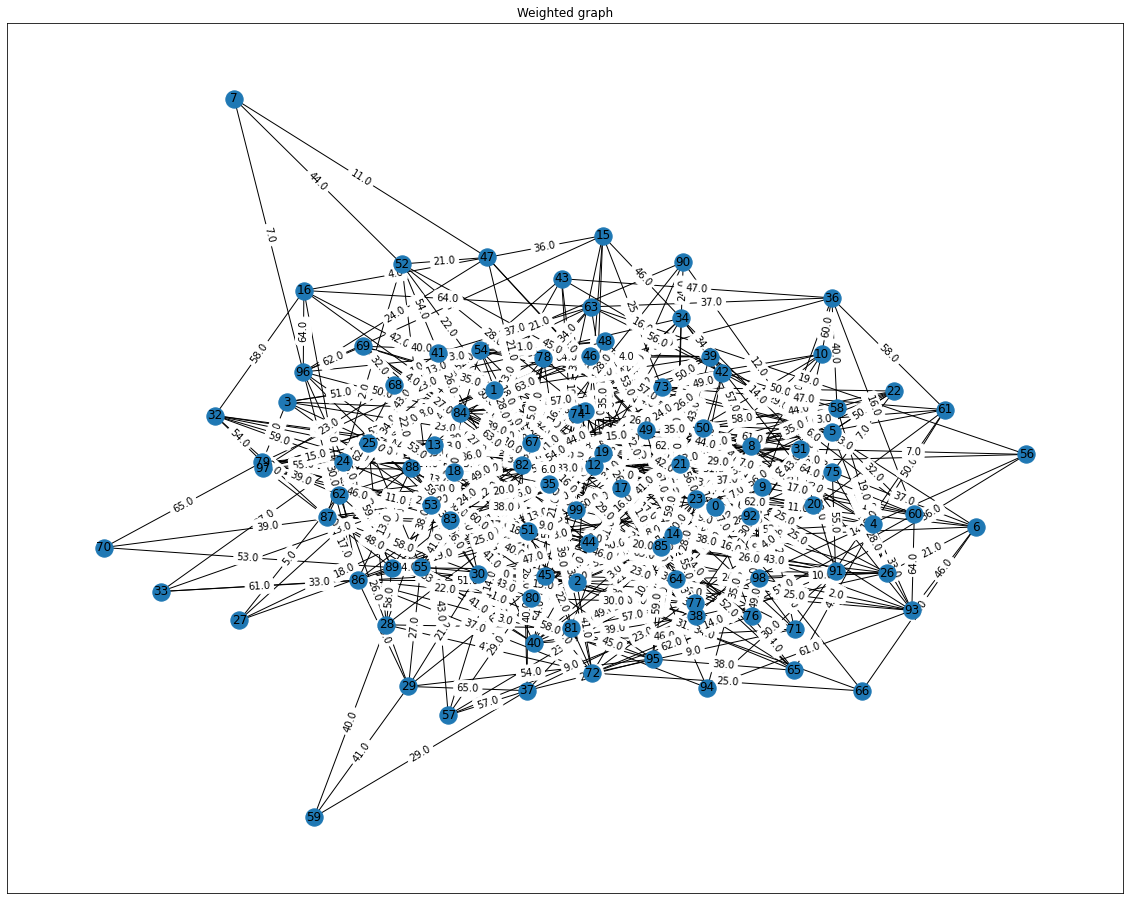

In [29]:
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Weighted graph')
plt.savefig('../Pictures/task6_graph', bbox_inches='tight')
plt.show()

In [50]:
noda_start = np.random.randint(nodes)
noda_finish = np.random.randint(nodes)
print(str(noda_start))
print(str(noda_finish))

49
56


In [88]:
start = time.perf_counter()
route = nx.dijkstra_path(G, noda_start, noda_finish)
print(f"{(time.perf_counter()-start)*1e6} мкc.")

465.299999632407 мкc.


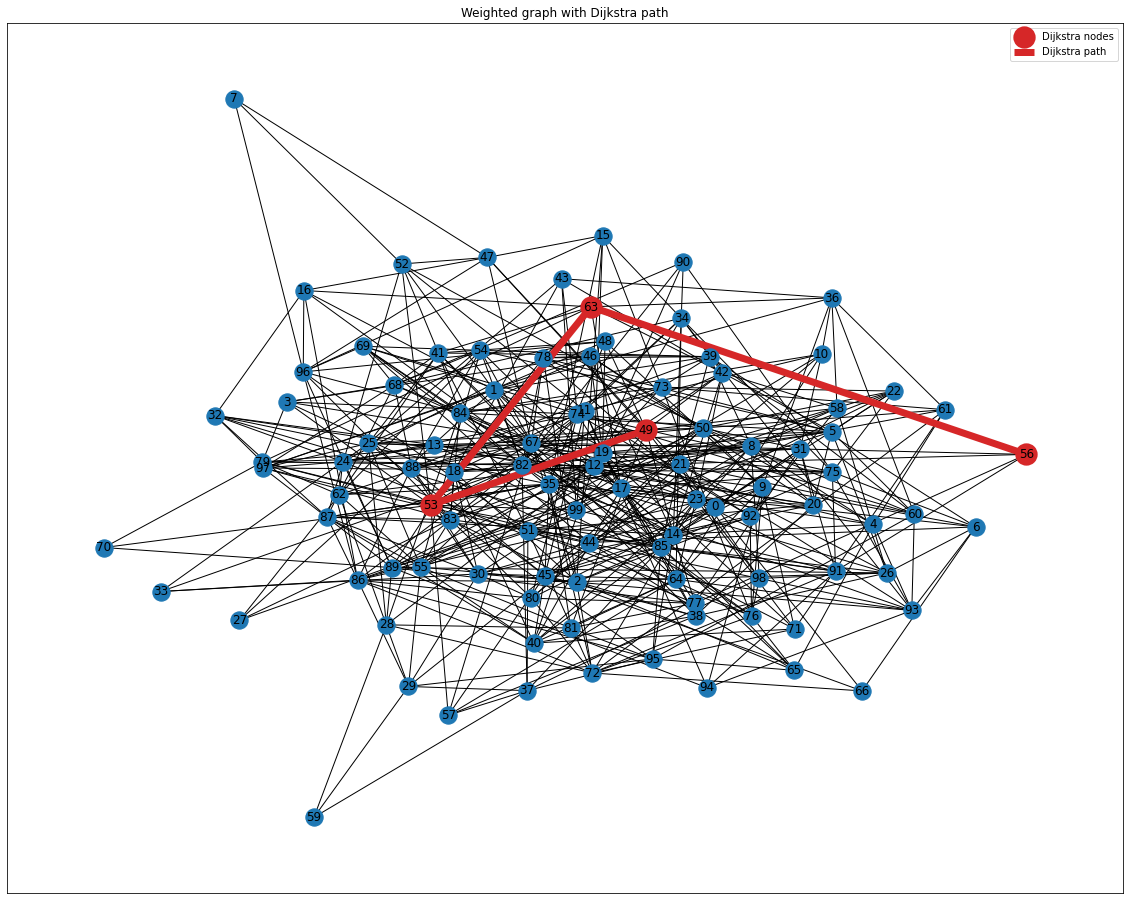

In [84]:
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
path_edges = list(zip(nx.dijkstra_path(G, noda_start, noda_finish), nx.dijkstra_path(G, noda_start, noda_finish)[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=nx.dijkstra_path(G, noda_start, noda_finish), node_color="tab:red", label='Dijkstra nodes', linewidths=5)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="tab:red", width=7, label='Dijkstra path')
plt.title('Weighted graph with Dijkstra path')
plt.legend()
plt.savefig('../Pictures/task6_dijkstra_path', bbox_inches='tight')
plt.show()

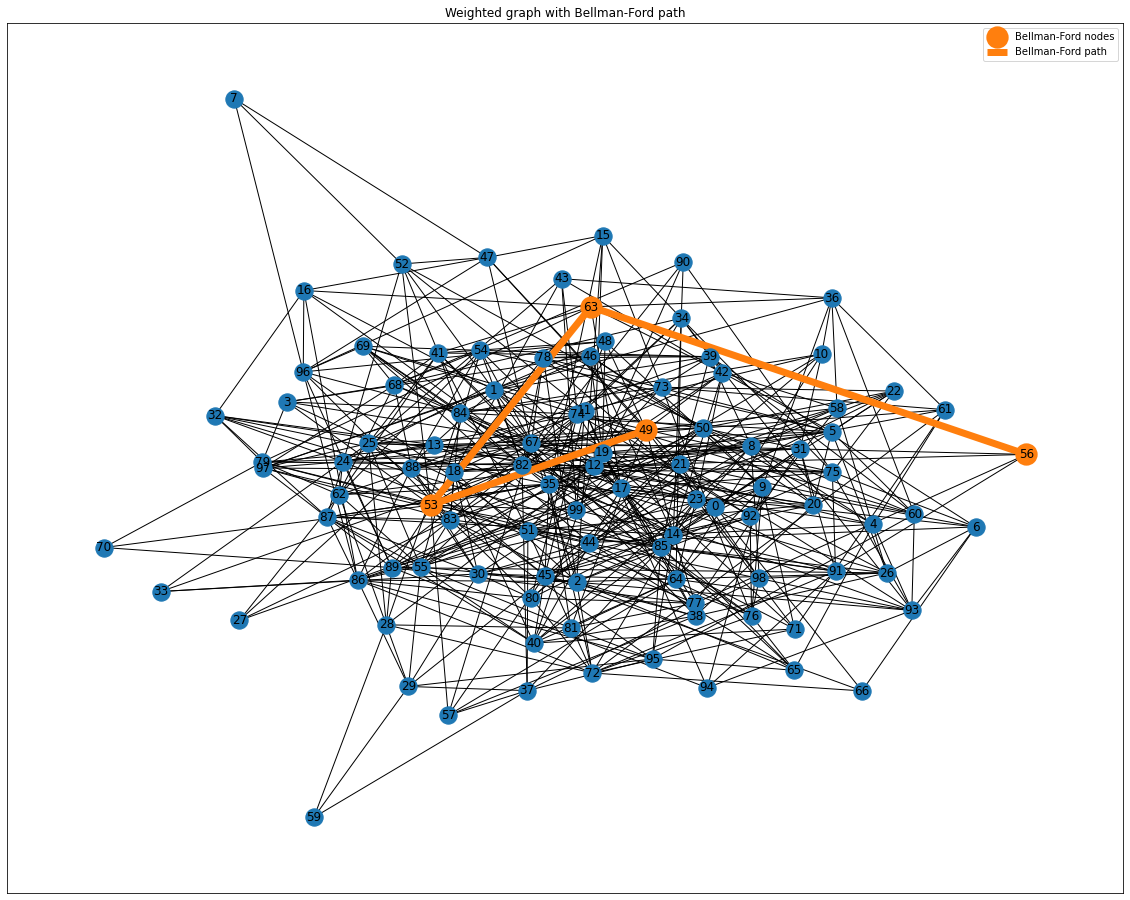

In [82]:
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
path_edges = list(zip(nx.bellman_ford_path(G, noda_start, noda_finish), nx.bellman_ford_path(G, noda_start, noda_finish)[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=nx.bellman_ford_path(G, noda_start, noda_finish), node_color="tab:orange", label='Bellman-Ford nodes', linewidths=5)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="tab:orange", width=7, label='Bellman-Ford path')
plt.title('Weighted graph with Bellman-Ford path')
plt.legend()
plt.savefig('../Pictures/task6_Bellman-Ford_path', bbox_inches='tight')
plt.show()

In [89]:
time_D = 0
time_BF = 0
for i in range(50):
    start = time.perf_counter()
    nx.dijkstra_path(G, noda_start, noda_finish)
    time_D += (time.perf_counter()-start)*1e6 #мкс
    start = time.perf_counter()
    nx.bellman_ford_path(G, noda_start, noda_finish)
    time_BF += (time.perf_counter()-start)*1e6 #мкс
print(f"{(time_D)/50} мкc.")
print(f"{(time_BF)/50} мкc.")

336.0919999977341 мкc.
1779.210000004241 мкc.


## Task 2

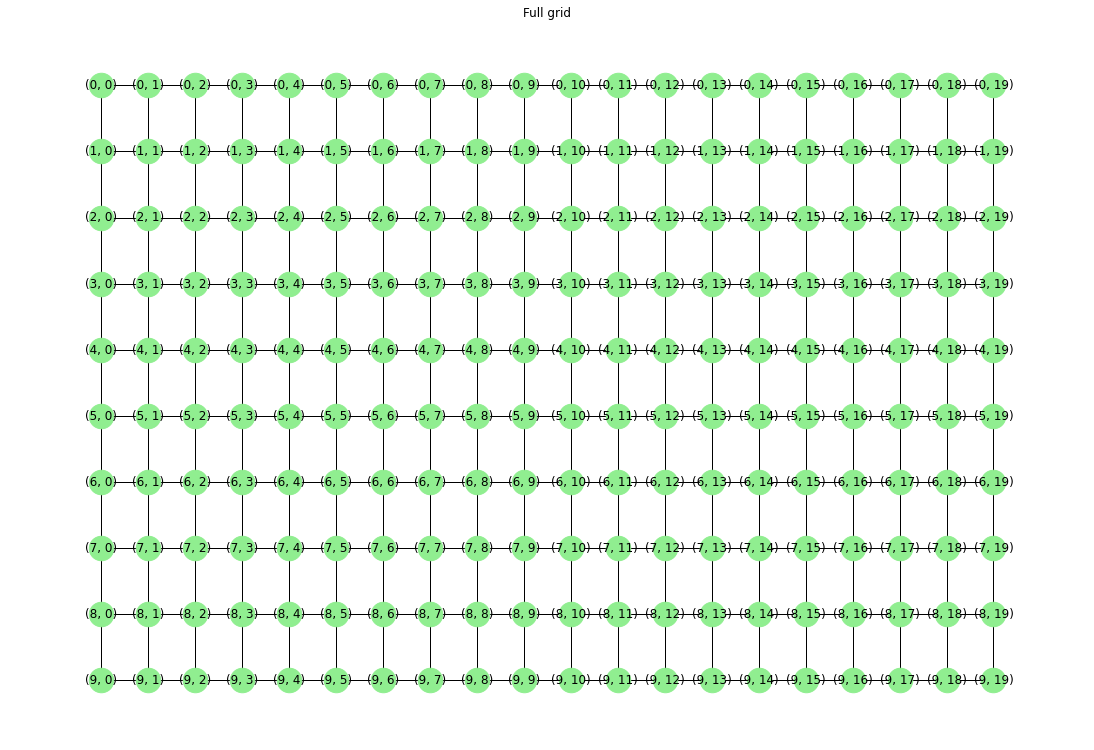

In [109]:
x = 10
y = 20
stops = 40
G = nx.grid_2d_graph(x, y)
plt.figure(figsize=(15, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos,
        node_color='lightgreen',
        with_labels=True,
        node_size=600)
plt.title('Full grid')
plt.savefig('../Pictures/task6_full_grid', bbox_inches='tight')

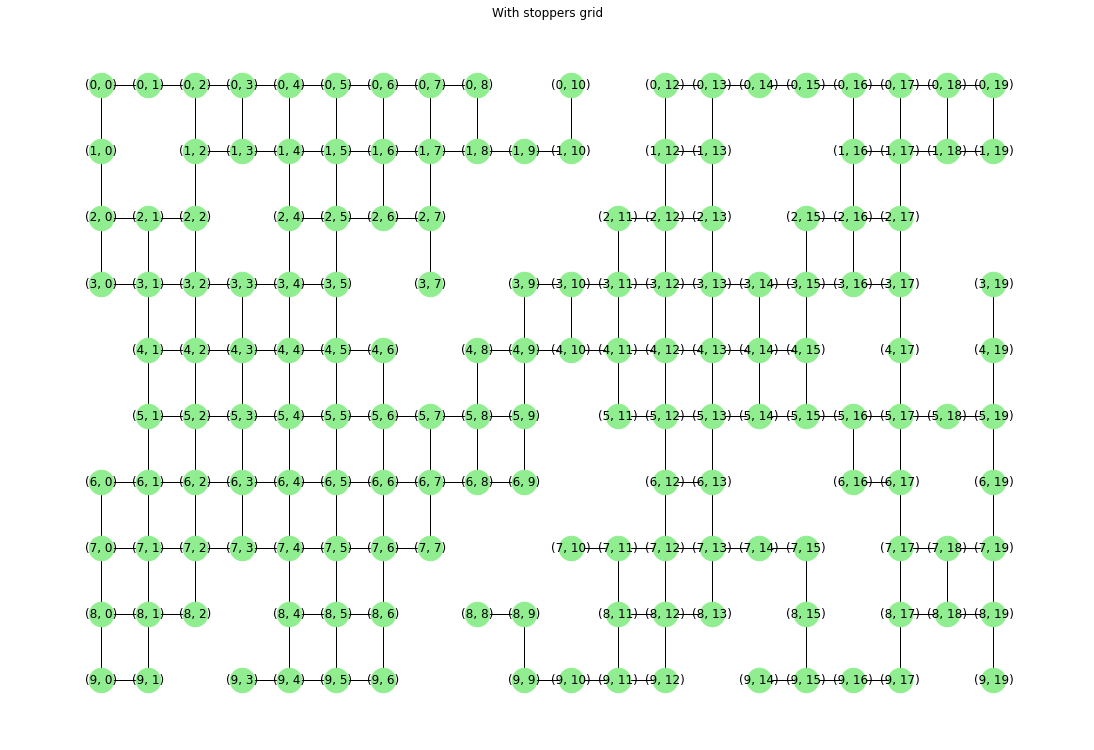

In [110]:
removed = 0
while removed < stops:
    X = np.random.randint(x)
    Y = np.random.randint(y)
    if (X, Y) in G:
        G.remove_node((X, Y))
        removed += 1
plt.figure(figsize=(15, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos,
        node_color='lightgreen',
        with_labels=True,
        node_size=600)
plt.title('With stoppers grid')
plt.savefig('../Pictures/task6_stoppers_grid', bbox_inches='tight')

In [143]:
noda_start = list(G.nodes.keys())[np.random.randint(len(list(G.nodes.keys())))]
noda_start

(7, 0)

In [144]:
noda_finish = list(G.nodes.keys())[np.random.randint(len(list(G.nodes.keys())))]
noda_finish

(0, 12)

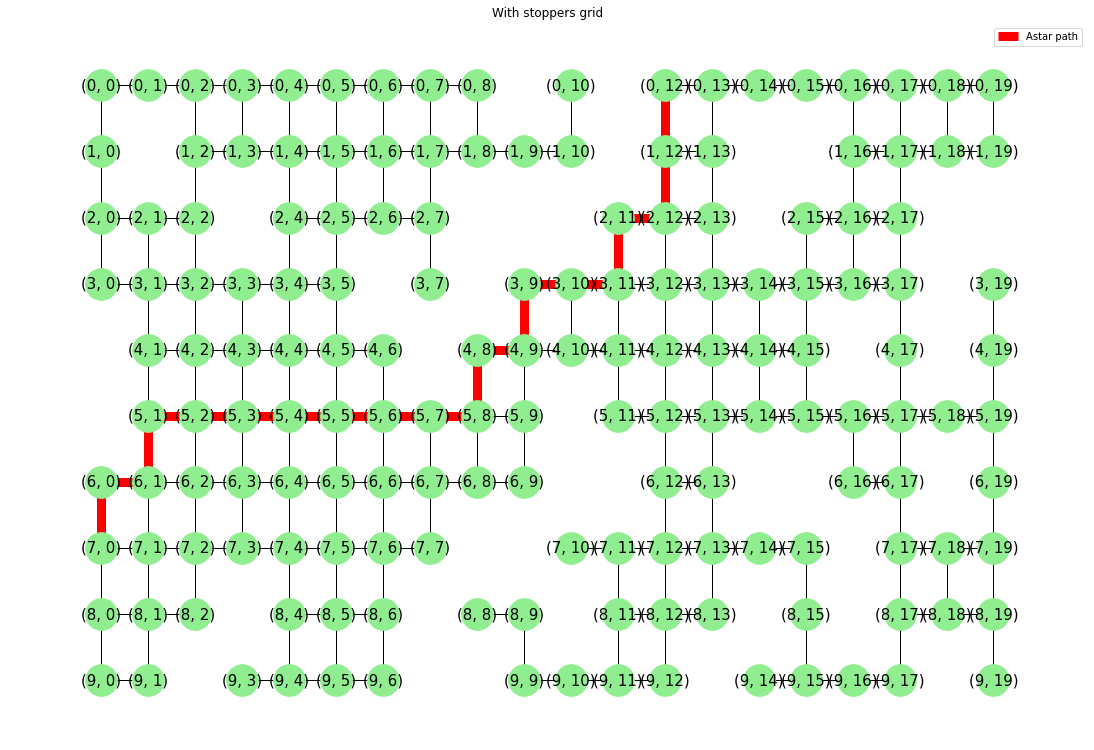

In [145]:
plt.figure(figsize=(15, 10))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos=pos,
        node_color='lightgreen',
        with_labels=True,
        node_size=1000,
        font_size=15,
        )
path_edges = list(zip(nx.astar_path(G, noda_start, noda_finish), nx.astar_path(G, noda_start, noda_finish)[1:]))
# nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=9, label='Astar path')
plt.title('With stoppers grid')
plt.legend()
plt.savefig('../Pictures/task6_astar_grid', bbox_inches='tight')
plt.show()

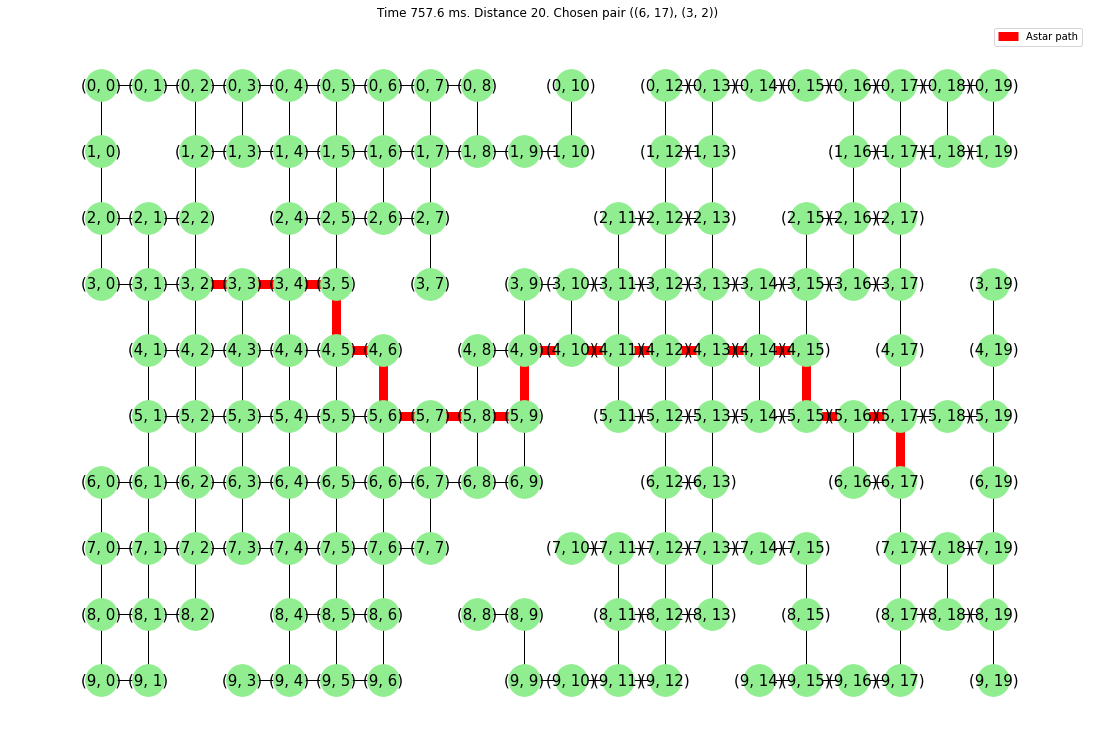

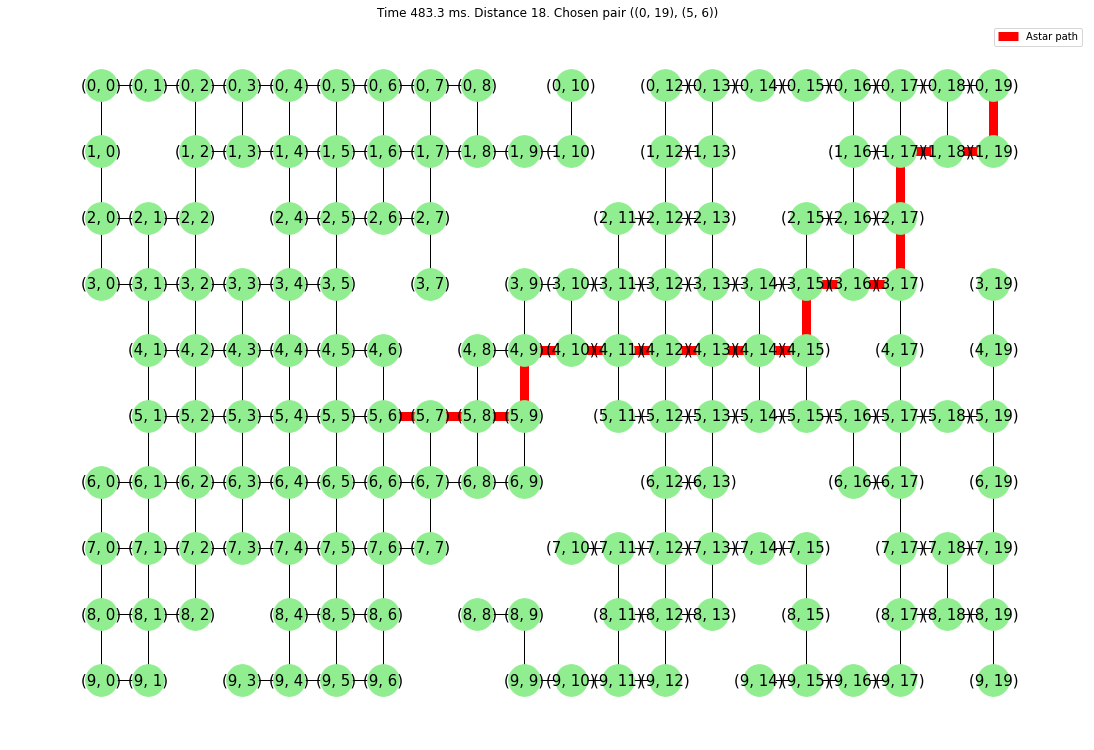

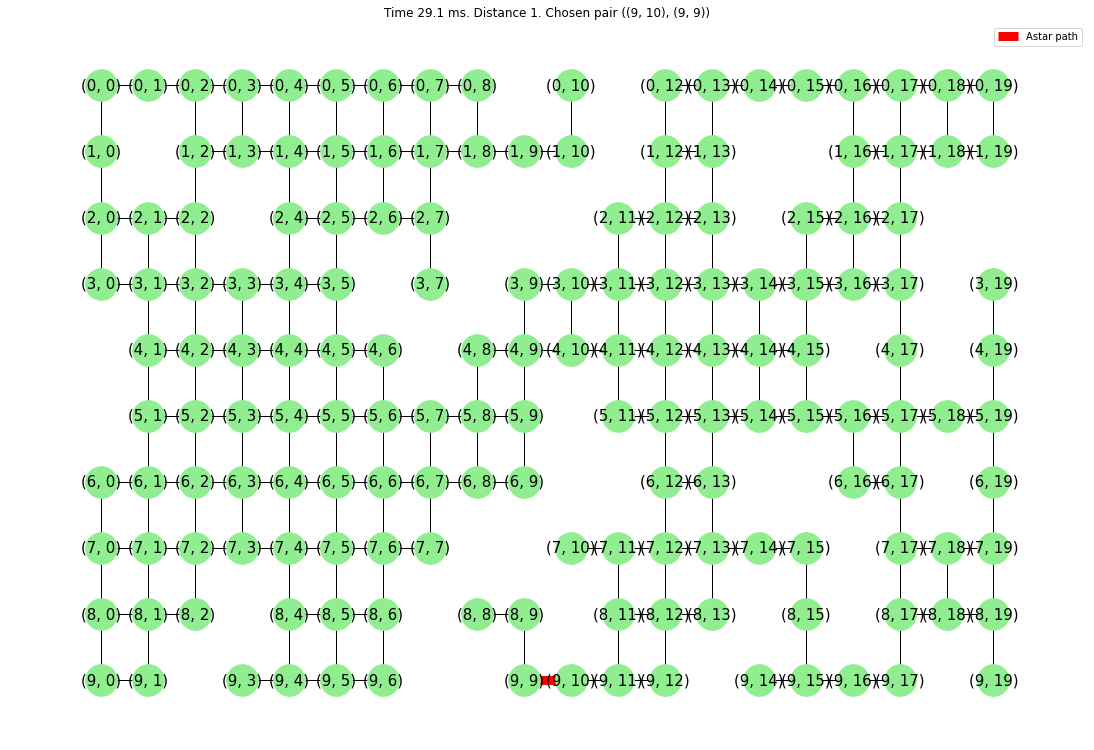

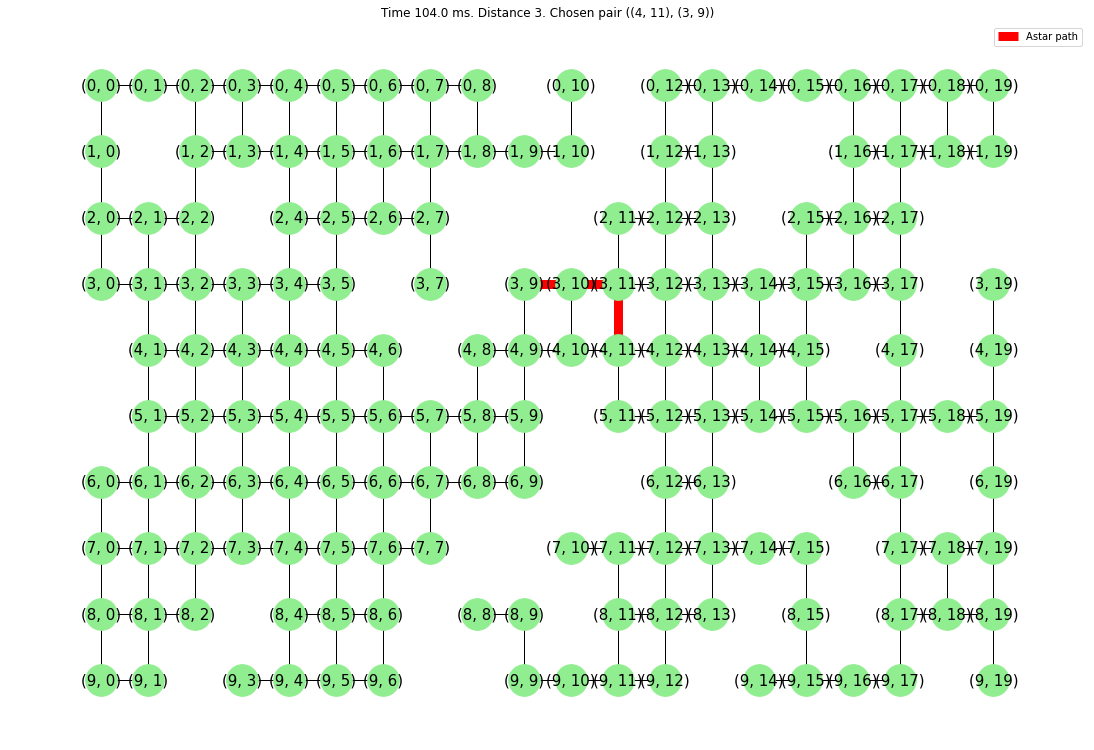

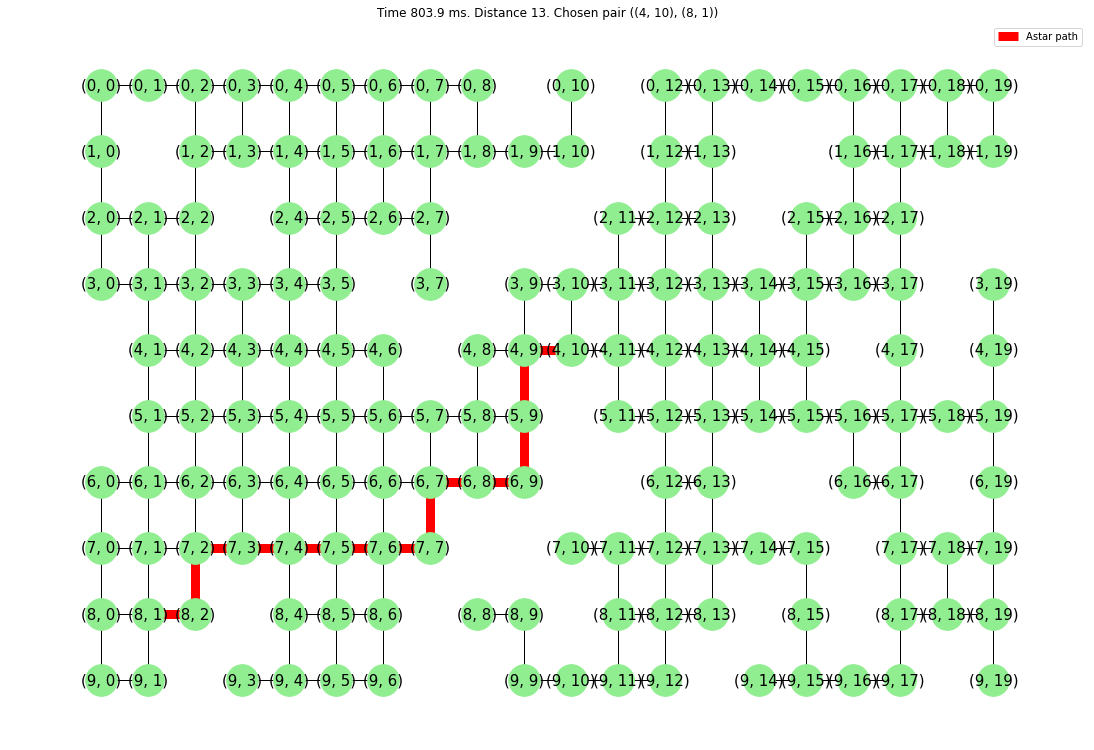

In [157]:
dist = []
times = []
for i in range(5):
    noda_start = list(G.nodes.keys())[np.random.randint(len(list(G.nodes.keys())))]
    noda_finish = list(G.nodes.keys())[np.random.randint(len(list(G.nodes.keys())))]
    p = nx.shortest_path_length(G, source=noda_start, weight=True)
    plt.figure(figsize=(15, 10))
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    nx.draw(G, pos=pos,
            node_color='lightgreen',
            with_labels=True,
            node_size=1000,
            font_size=15,
            )
    start = time.perf_counter()
    route = nx.astar_path(G, noda_start, noda_finish)
    timer = time.perf_counter() - start
    times.append(timer)
    dist.append(p[noda_finish])
    path_edges = list(zip(route, route[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=9, label='Astar path')
    plt.title(f"Time {np.round(timer*1e6, 1)} ms. Distance {p[noda_finish]}. Chosen pair {noda_start, noda_finish}")
    plt.legend()
    plt.savefig(f"../Pictures/task6_astar_grid_{noda_start}_{noda_finish}", bbox_inches='tight')
    plt.show()

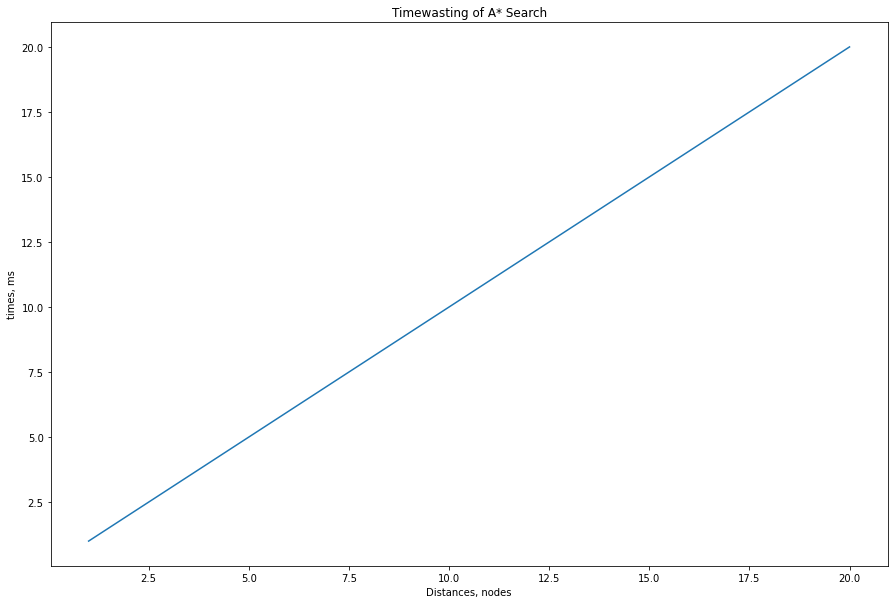

In [170]:
plt.figure(figsize=(15, 10))
x = dist
y = times
a = np.argsort(dist)
plt.plot(np.array(x)[a],np.array(dist)[a])
plt.title('Timewasting of A* Search')
plt.xlabel('Distances, nodes')
plt.ylabel('times, ms')
plt.savefig('../Pictures/task6_dist_time_analysis', bbox_inches='tight')
plt.show()